In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.utils import plot_model
from IPython.display import Image

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [0]:
# Load the data
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [24]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

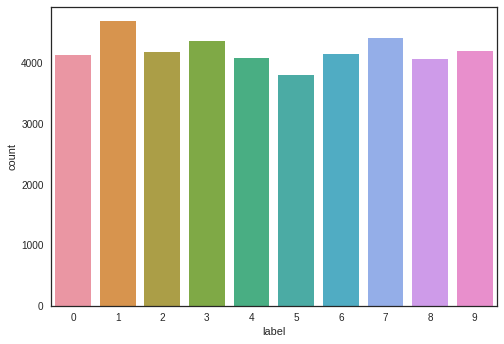

In [25]:
Y_train  = train["label"]
X_train = train.drop(labels=["label"], axis=1)
del train
g = sns.countplot(Y_train)
Y_train.value_counts().sort_values(ascending=False)

In [26]:
# Check missing values
print(f"Missing values: {X_train.isna().any().sum()}")
print(X_train.isna().any().describe())

Missing values: 0
count       784
unique        1
top       False
freq        784
dtype: object


In [27]:
print(f"Missing values: {test.isna().any().sum()}")
print(test.isna().any().describe())

Missing values: 0
count       784
unique        1
top       False
freq        784
dtype: object


In [0]:
# Normalization
X_train /= 255.0
test /= 255.0

In [29]:
print(X_train.values.max())
print(X_train.values.min())

1.0
0.0


In [30]:
print(test.values.max())
print(test.values.min())

1.0
0.0


In [0]:
# Reshape into 28px x 28px x 1
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [32]:
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [0]:
# One hot encoding Y_train
Y_train = to_categorical(Y_train, num_classes=10)

In [0]:
# Train, validation split (for imbalanced Y stratify=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

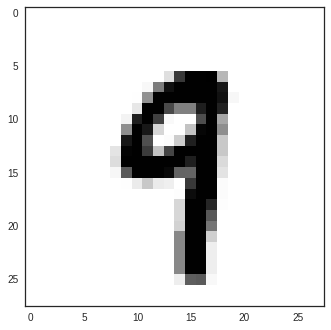

In [35]:
# Simple visualisation
plt.imshow(X_train[2][:,:,0])

In [0]:
# Model
# relu max(0, z)

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


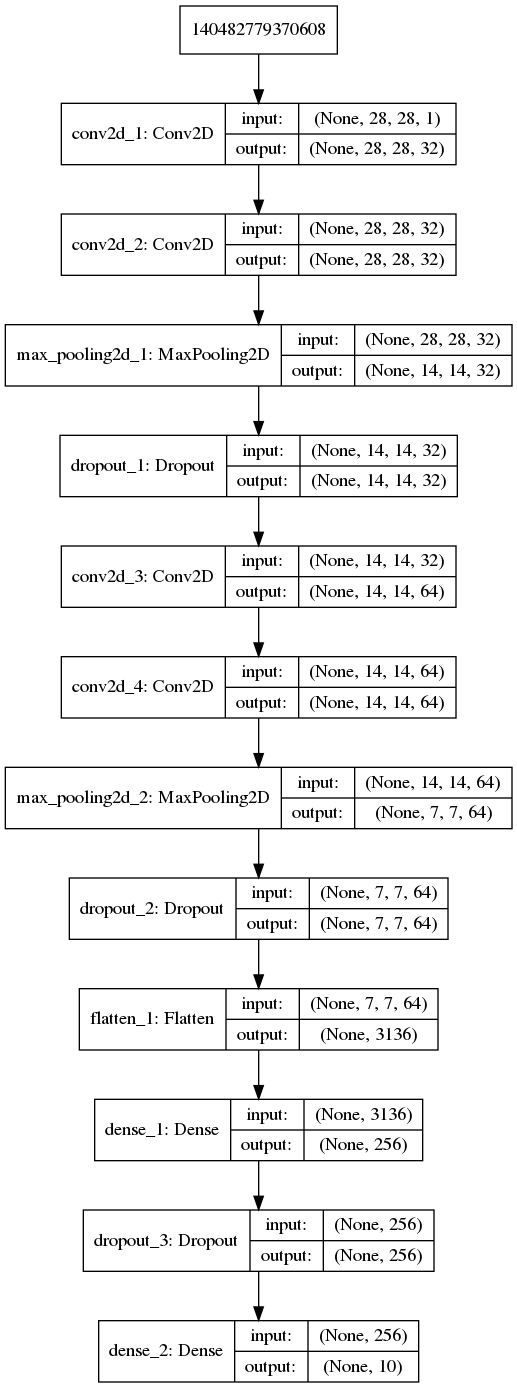

In [0]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image("model.png")

In [2]:
model_2 = Sequential()
model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_2.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_2.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(1024, activation = "relu"))
model_2.add(Dense(512, activation = "relu"))
model_2.add(Dense(256, activation = "relu"))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))
model_2.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


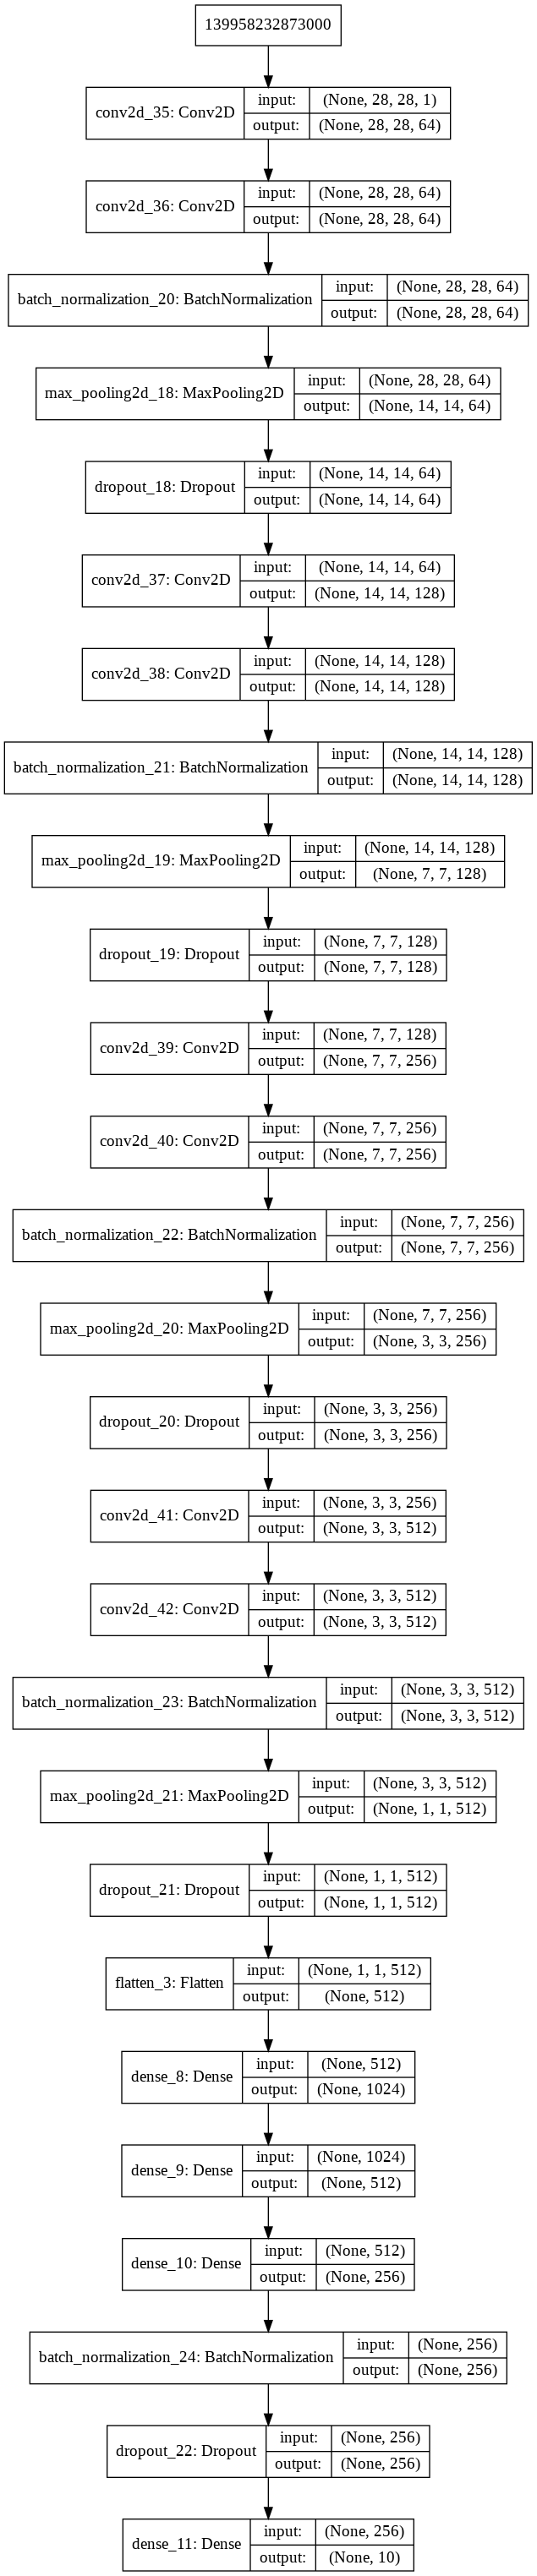

In [61]:
plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True)
Image("model_2.png")

In [0]:
# Optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 100
batch_size = 1024

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [66]:
# Fit the model
history = model_2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/100
 - 22s - loss: 0.8692 - acc: 0.7171 - val_loss: 1.0395 - val_acc: 0.7131
Epoch 2/100
 - 17s - loss: 0.2550 - acc: 0.9219 - val_loss: 2.9645 - val_acc: 0.6326
Epoch 3/100
 - 17s - loss: 0.1622 - acc: 0.9549 - val_loss: 0.1319 - val_acc: 0.9776
Epoch 4/100
 - 17s - loss: 0.0981 - acc: 0.9710 - val_loss: 0.2753 - val_acc: 0.9605
Epoch 5/100
 - 17s - loss: 0.0778 - acc: 0.9772 - val_loss: 0.0747 - val_acc: 0.9862
Epoch 6/100
 - 17s - loss: 0.0555 - acc: 0.9845 - val_loss: 0.7018 - val_acc: 0.9093
Epoch 7/100
 - 17s - loss: 0.0540 - acc: 0.9843 - val_loss: 0.1343 - val_acc: 0.9748
Epoch 8/100
 - 17s - loss: 0.0463 - acc: 0.9868 - val_loss: 0.0534 - val_acc: 0.9876
Epoch 9/100
 - 17s - loss: 0.0442 - acc: 0.9870 - val_loss: 0.0836 - val_acc: 0.9817
Epoch 10/100
 - 17s - loss: 0.0431 - acc: 0.9872 - val_loss: 0.2503 - val_acc: 0.9576
Epoch 11/100
 - 17s - loss: 0.0342 - acc: 0.9902 - val_loss: 0.0712 - val_acc: 0.9871
Epoch 12/100
 - 17s - loss: 0.0319 - acc: 0.9905 - val_loss: 0.

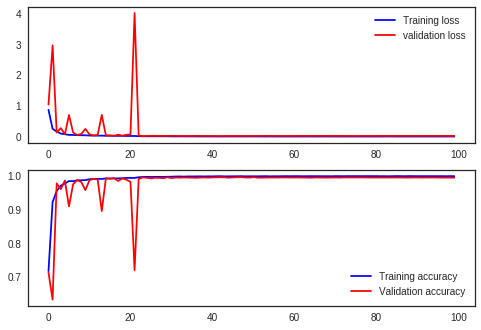

In [67]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

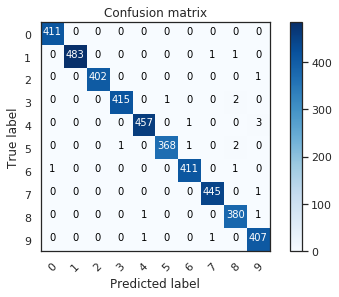

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

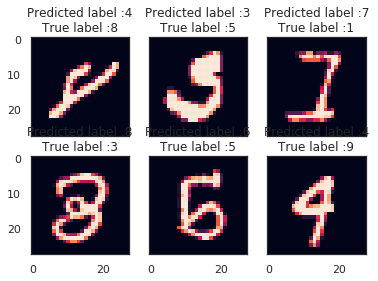

In [0]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [0]:
results = model_2.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen_4.csv",index=False)

In [0]:
model_2.save('digit_recognizer_4.h5')
# model = load_model('digit_recognizer.h5')